In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [2]:
data = pd.read_csv('./OnlineRetail.csv',low_memory=False)

In [3]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
#Part a

In [4]:
summary = data.describe(include='all')
summary

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
count,530104,530104,530104.000000,530104,530104.000000,530104,530104.000000
unique,19960,3922,NaN,18499,NaN,38,NaN
top,573585,85123A,NaN,10/31/11 14:41,NaN,United Kingdom,NaN
freq,1114,2265,NaN,1114,NaN,485123,NaN
mean,NaN,NaN,10.542037,NaN,3.907625,NaN,20.121871
std,NaN,NaN,155.524124,NaN,35.915681,NaN,270.356743
min,NaN,NaN,1.000000,NaN,0.001000,NaN,0.001000
25%,NaN,NaN,1.000000,NaN,1.250000,NaN,3.750000
50%,NaN,NaN,3.000000,NaN,2.080000,NaN,9.900000
75%,NaN,NaN,10.000000,NaN,4.130000,NaN,17.700000


Count of Unique Values:
('InvoiceNo', 19960) ('StockCode', 3922) ('Country', 38)


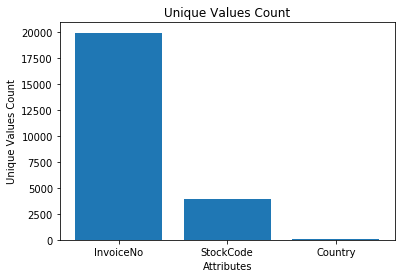

In [37]:
# Unique values
unique_vals = summary[['InvoiceNo', 'StockCode', 'Country']].loc['unique']
print('Count of Unique Values:')
print(*zip(unique_vals.index,unique_vals.tolist()))
plt.bar(unique_vals.index, unique_vals.tolist())
plt.xlabel("Attributes")
plt.ylabel("Unique Values Count")
plt.title('Unique Values Count')
plt.show()

Unit Price Stats: 
Mean:  3.90762524712132
std:  35.91568110425544


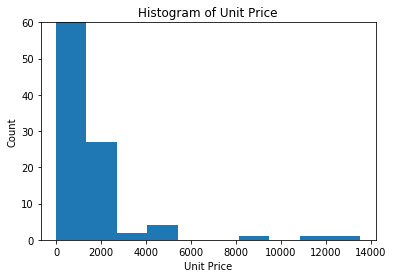

Remark: Y axis limited to 60


In [25]:
# Unit prices
print('Unit Price Stats: ')
unitp_mean = summary[['UnitPrice']].loc['mean']
unitp_std = summary[['UnitPrice']].loc['std']
print('Mean: ', *unitp_mean.tolist())
print('std: ', *unitp_std.tolist())
plt.hist(data['UnitPrice'].tolist())
plt.ylim([0,60])
plt.xlabel("Unit Price")
plt.ylabel("Count")
plt.title('Histogram of Unit Price')
plt.show()
print('Remark: Y axis limited to 60')

Quantity Stats: 
Mean:  10.542037034242338
std:  155.52412351063626


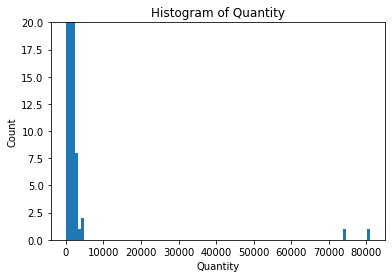

Remark: Y axis limited to 


In [36]:
# Quantity
print('Quantity Stats: ')
unitp_mean = summary[['Quantity']].loc['mean']
unitp_std = summary[['Quantity']].loc['std']
print('Mean: ', *unitp_mean.tolist())
print('std: ', *unitp_std.tolist())
plt.hist(data['Quantity'].tolist(), bins=100)
plt.ylim([0,20])
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title('Histogram of Quantity')
plt.show()
print('Remark: Y axis limited to 20')

In [7]:
countries = data['Country'].unique()

In [8]:
# Part b
for i in countries:
    print('\n\n'+i+': \n')
    print(data[['Country', 'StockCode', 'TotalPrice']][data['Country'] == i]\
    .groupby(['Country', 'StockCode'],as_index=False).sum()\
    .sort_values(by=['TotalPrice'],ascending=False)[['StockCode', 'TotalPrice']][:5].to_string(index=False))



United Kingdom: 

StockCode  TotalPrice
      DOT   206248.77
    23843   168469.60
    22423   142273.29
   85123A    98723.75
    47566    93658.53


France: 

StockCode  TotalPrice
     POST    15454.00
        M     9492.37
    23084     7277.20
    22423     2816.85
    21731     2169.75


Australia: 

StockCode  TotalPrice
    23084     3375.84
    22722     2082.00
    21731     1987.20
    22720     1983.20
    22423     1978.20


Netherlands: 

StockCode  TotalPrice
    23084     9568.48
    22326     7991.40
    22629     7485.60
    22630     6828.60
    22328     4039.20


Germany: 

StockCode  TotalPrice
     POST    21001.00
    22423     9061.95
    22326     3598.95
        M     2296.25
    22328     1982.40


Norway: 

StockCode  TotalPrice
     POST      2870.5
        M       840.3
    22693       538.8
    22635       527.4
    22634       487.6


EIRE: 

StockCode  TotalPrice
    22423     7844.25
        M     7049.66
       C2     5240.00
    22838     4265.55

In [9]:
# Part c

In [10]:
aprori_data = data[['InvoiceNo', 'StockCode']]

In [11]:
baskets = aprori_data.groupby(['InvoiceNo']).groups

In [12]:
transactions = []
for key in baskets.keys():
    tmp = [i for i in aprori_data['StockCode'][baskets[key]].unique()]
    transactions.append(tmp)

In [14]:
association_rules = list(apriori(transactions))

In [15]:
def clean(input_list):
    input_list=list(input_list)
    input_list.sort()
    input_list=str(input_list).replace("[",'').replace("]",'').replace(" ",'').replace("'",'')
    return input_list

In [16]:
results=pd.DataFrame(columns=["itemset","support","X","Y","confidence","lift"])
for rule in association_rules:
    itemset=clean(rule.items)
    support=rule.support
    for comb in rule.ordered_statistics:
        X=clean(comb.items_base)
        Y=clean(comb.items_add)
        confidence=comb.confidence
        lift=comb.lift
        results=results.append({"itemset":itemset,"support":support,"X":X,"Y":Y,
                        "confidence":confidence,"lift":lift},ignore_index=True)

In [17]:
results

,itemset,support,X,Y,confidence,lift
0,85099B,0.104659,,85099B,0.104659,1.0
1,85123A,0.110120,,85123A,0.110120,1.0
